In [1]:
import keras
from keras.preprocessing.sequence import pad_sequences
from  keras.preprocessing.text import Tokenizer
import os
import numpy as np
import pandas as pd
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('clean.csv',skiprows=1, names = ['Input','Sentiment'])

from sklearn.utils import shuffle
df = shuffle(df)

In [3]:
df.Sentiment.value_counts()

sadness    8838
joy        8344
anger      3987
suicide    2492
anxious    1946
Name: Sentiment, dtype: int64

In [4]:
X = df['Input']
tokenizer=Tokenizer(oov_token='UNK')
tokenizer.fit_on_texts(X)
vocab_size = len(tokenizer.word_index)
X_train=tokenizer.texts_to_sequences(X)
X_train=pad_sequences(X_train,maxlen=80,padding='post')
df['Sentiment']=df.Sentiment.replace({'joy':0,'anger':1,'suicide':2,'sadness':3,'anxious':4})
Y_train=df['Sentiment'].values
Y_train=to_categorical(Y_train)

In [5]:
import pickle

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

print(vocab_size)

17439


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2)

In [7]:
from keras.models import Sequential
from keras.layers import LSTM,Bidirectional,Dense,Embedding,Dropout

In [8]:
model=Sequential()
model.add(Embedding(vocab_size+1, 64, input_length=80))
model.add(Dropout(0.7))
model.add(Bidirectional(LSTM(80,return_sequences=True)))
model.add(Bidirectional(LSTM(160)))
model.add(Dense(5,activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 80, 64)            1116160   
_________________________________________________________________
dropout (Dropout)            (None, 80, 64)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 80, 160)           92800     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 320)               410880    
_________________________________________________________________
dense (Dense)                (None, 5)                 1605      
Total params: 1,621,445
Trainable params: 1,621,445
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
hist=model.fit(X_train, y_train,epochs=20,validation_split=0.33)

Epoch 1/20
429/429 [==============================] - 22s 34ms/step - loss: 1.2847 - accuracy: 0.4253 - val_loss: 0.8543 - val_accuracy: 0.6459
Epoch 2/20
429/429 [==============================] - 13s 31ms/step - loss: 0.8030 - accuracy: 0.6636 - val_loss: 0.6871 - val_accuracy: 0.7122
Epoch 3/20
429/429 [==============================] - 14s 32ms/step - loss: 0.6036 - accuracy: 0.7552 - val_loss: 0.5099 - val_accuracy: 0.7996
Epoch 4/20
429/429 [==============================] - 13s 31ms/step - loss: 0.4591 - accuracy: 0.8232 - val_loss: 0.4628 - val_accuracy: 0.8164
Epoch 5/20
429/429 [==============================] - 13s 31ms/step - loss: 0.3872 - accuracy: 0.8566 - val_loss: 0.4875 - val_accuracy: 0.8111
Epoch 6/20
429/429 [==============================] - 14s 32ms/step - loss: 0.3573 - accuracy: 0.8663 - val_loss: 0.4780 - val_accuracy: 0.8156
Epoch 7/20
429/429 [==============================] - 13s 31ms/step - loss: 0.3196 - accuracy: 0.8804 - val_loss: 0.4574 - val_accuracy:

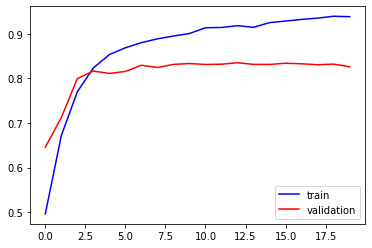

In [10]:
plt.plot(hist.history['accuracy'],c='b',label='train')
plt.plot(hist.history['val_accuracy'],c='r',label='validation')
plt.legend(loc='lower right')
plt.show()

In [11]:
model.evaluate(X_test,y_test)

161/161 [==============================] - 1s 9ms/step - loss: 0.5310 - accuracy: 0.8301


[0.5309878587722778, 0.830144464969635]

In [12]:
model.save('sentmodel.h5')